<a href="https://colab.research.google.com/github/petersenjppb/Codes/blob/master/Scatter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [468]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/petersenjppb/Codes/master/ener_oparameter-wcna.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4648k  100 4648k    0     0  18.7M      0 --:--:-- --:--:-- --:--:-- 18.7M


In [0]:
ener=pd.read_csv('ener_oparameter-wcna.csv')
ener.columns=ener.columns.str.replace(' ','')


In [0]:
df=pd.DataFrame(ener,columns=['sig666','sig655','sig555','sig544','sig533','sig532','sig522','sig521','sig444','sig433','sig422','sig421','sig411','sig400','sig322','sig311','sig300','sig211','sig200','sig100','sig000'])
#df=pd.DataFrame(ener,columns=['sig555','sig322','sig311'])
from sklearn import decomposition
pca=decomposition.PCA(n_components=16)
df=pca.fit_transform(df)
df2=pd.DataFrame(ener,columns=['Etot'])
etot=df2['Etot'].tolist()

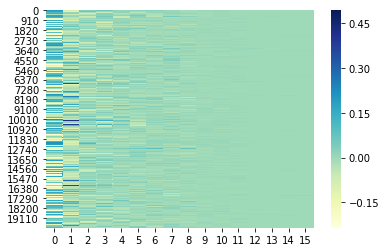

In [471]:
import seaborn as sns
sns.heatmap(df, cmap="YlGnBu")
plt.show()

In [0]:
#pd.plotting.scatter_matrix(df,figsize=(10,10),marker='o',alpha=0.5,s=2,diagonal='hist',c=etot)
#plt.show()

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(df,df2,test_size=0.3,random_state=0)

In [475]:
reg = MLPRegressor(solver='adam', alpha=1e-4, hidden_layer_sizes=(100), max_iter=500, tol=1e-9, random_state=0)
#KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=1e-09,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [476]:
print('predicciones sobre el conjunto Test:\n{}'.format(reg.predict(X_test)))

predicciones sobre el conjunto Test:
[-141.12635003 -141.62042004 -140.95641602 ... -141.57078103 -141.44235222
 -140.980296  ]


In [477]:
print(y_test)

             Etot
19134 -141.016739
4981  -141.699280
16643 -141.394043
19117 -140.387466
5306  -141.277985
230   -140.127319
3148  -140.398605
11525 -141.560089
13672 -142.351288
1624  -141.765167
13415 -142.351471
18827 -140.206100
18550 -141.093307
5228  -140.695221
4623  -141.410660
3719  -141.528107
11640 -142.351486
2461  -140.207535
2051  -140.586090
15410 -141.256027
13290 -141.374390
6518  -140.898560
768   -141.726624
19197 -140.775299
16663 -141.373917
17114 -140.825531
4144  -139.881180
18896 -140.331223
16559 -140.082352
7025  -140.459366
...           ...
13238 -140.672150
18683 -141.559860
11839 -141.729019
9659  -141.333878
5412  -140.240448
18817 -141.159515
2470  -141.764465
2880  -141.766724
12730 -140.387115
11610 -140.789062
1391  -140.450104
3959  -141.766159
10015 -140.848480
3055  -140.462463
4898  -140.277710
10106 -141.181396
19990 -140.961243
8782  -141.560226
10031 -140.770676
11877 -141.766876
4029  -141.669495
9652  -140.854568
8296  -140.276642
10157 -140

In [478]:
print('precisión de predicciones sobre el test: {:.2f}'.format(reg.score(X_test,y_test)))

precisión de predicciones sobre el test: 0.50
